<a href="https://colab.research.google.com/github/eunho792/BIGDATA/blob/master/drink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#steop 1 탐색

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv("drinks.csv")

drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
# 피처간의 상관관계 탐색

#두개 피처의  상관계수 구하기
#beer_servings wine_servings의 상관계수를 구해보자
#pearson은 상관계수를 구하는 계싼 방법 중 하나이며 가장 널리 쓰이는 방법이다.
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
#상관 분석
#상관 분석이란 두 변수 간의 선형적 관계를 상관계수로 표현하는 것이다.
#상관 계수를 구한다는 것은 공분산의 개념을 포함한다
#공분산은 2개의 확률변수에 대한 상관 정도로 2개의 변수 중 하나의 값이 상승하는 경향을 보일떄
#다른 값도 상승하는 경향을 수치로 나타낸 것이다.
#공분산만으로 두 확률 변수의 상관 관계를 구하게 되면 두변수의 단위 크기에 따라 영향을 받을수 밖에 없다\
#따라서 , -1에서 1사의 값으로 바꾸어 표현 한것을 상관계수라 한다

In [ ]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)


                              beer_servings  ...  total_litres_of_pure_alcohol
beer_servings                      1.000000  ...                      0.835839
spirit_servings                    0.458819  ...                      0.654968
wine_servings                      0.527172  ...                      0.667598
total_litres_of_pure_alcohol       0.835839  ...                      1.000000

[4 rows x 4 columns]


In [ ]:
pip install seaborn

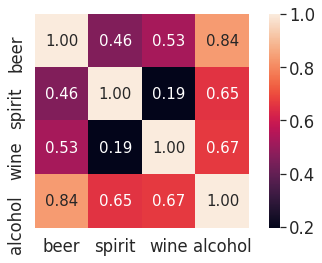

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()


In [ ]:
sns.set(style='whitegrid',context='notebook')


In [ ]:
#step 3 전처리


In [ ]:
print(drinks.isnull().sum())
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [ ]:
#결측 데이터 처리, 기타 대륙으로 통합->OT
drinks['continent']=drinks['continent'].fillna('OT')
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


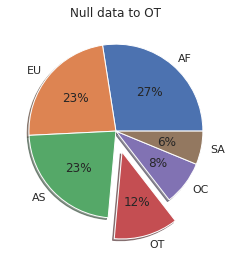

In [ ]:
labels=drinks['continent'].value_counts().index.tolist()
fracs1=drinks['continent'].value_counts().tolist()
explode=(0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%',shadow=True)

plt.title("Null data to OT")
plt.show()

In [ ]:
#대륙별 spirit_servings의 통계적 정보는
#agg() 함수를 사용하여 그룹 단위로 분석을 한번에 수행한다. 여러가지 연산 결과를 동시에 확인
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
#전체 평균보다 많으 ㄴ안코올을 섭취하는 대륙
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean= drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean >=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
#평균 beer_servings가 가장 높은 대륙은?
beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


In [ ]:
#step 4분석
#t-검정
#지금까지 두 피처 간의 상관성을 계산하거나 그룹단위로 나누어 수치 정보를 분석하느 방식
#이러한 분석 데이터에서 인사이트를 발견하는데 아주 유용하게 사용되는 방식
#분석가의 주관에 따라 도출된 내용이기 때문에 분석 자체의 타당성을 증명하기에 한계가 있다.
#분석 결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정이 필요하다

In [ ]:
#아프리카와 유럽 간의 맥주 소비량 차이를 검정하자.

africa = drinks.loc[drinks['continent']=="AF"]
europe = drinks.loc[drinks['continent']=="EU"]

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],europe['beer_servings'])

print(tTestResult)

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)


In [ ]:
# pvalue:유의 확률 보통 0.05(또는 0.01)이 기준, 가설이 얼마나 믿을만한 것인지를 나타내는 지표
# pvalue가 0.00000000...이하로 나타났다. 따라서 아프리카와 유럽 대륙 간의 맥주 소비량 차이는 통계적으로
